# 📘 Employee Attrition - Exploratory Data Analysis (EDA)

## 📄 Description  
This notebook performs an **Exploratory Data Analysis (EDA)** to understand the key factors influencing employee attrition.  
It includes **data visualization, feature distributions, and correlation analysis** to gain insights from the dataset.

## 👨‍💻 Author  
**Kfir Tayar** 

© Copyright 2025, Kfir Tayar. All rights reserved.  

## 🔹 Notebook Overview  
- Load and inspect the dataset  
- Perform basic summary statistics  
- Check for missing values  
- Analyze the distribution of key features  
- Visualize correlations between features  


In [2]:
# Import Libraries & Modules
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the path to the utils directory
sys.path.append(os.path.abspath('../utils'))

#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

from eda_utils import data_protocol, display_png_plots

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


### Load Data Set

In [4]:
processed_df = pd.read_pickle("../Data/processed_employee_data_20250305.pkl")

In [5]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gender                    74498 non-null  category
 1   Years at Company          74498 non-null  int64   
 2   Job Role                  74498 non-null  category
 3   Monthly Income            74498 non-null  int64   
 4   Work-Life Balance         74498 non-null  category
 5   Job Satisfaction          74498 non-null  category
 6   Performance Rating        74498 non-null  category
 7   Number of Promotions      74498 non-null  int64   
 8   Overtime                  74498 non-null  category
 9   Distance from Home        74498 non-null  int64   
 10  Education Level           74498 non-null  category
 11  Marital Status            74498 non-null  category
 12  Number of Dependents      74498 non-null  int64   
 13  Job Level                 74498 non-null  cate

### Data Protocol

In [7]:
# Create data protocol xlsx files
data_protocol(processed_df, folder='data', df_name='Employee_Attrition')

Creating Employee_Attrition_datatype
Employee_Attrition_Max
Employee_Attrition_Min
Employee_Attrition_Missing_Values
and Employee_Attrition_Unique files...

Data Protocol process is done!
Saved path: data/data_protocol


### AutoVis report

In [9]:
saving_plots_path = f"../data/autovis_plots/"
os.makedirs(saving_plots_path, exist_ok=True)

dft = AV.AutoViz(
    "",
    sep=",",
    depVar="Attrition",
    dfte=processed_df,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=500,
    max_cols_analyzed=22,
    save_plot_dir=saving_plots_path
)

    Since nrows is smaller than dataset, loading random sample of 500 rows into pandas...
Shape of your Data Set loaded: (500, 23)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents']
    String-Categorical Columns: []
    Factor-Categorical Columns: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', '

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Years at Company,int64,0.000000,9,1.000000,49.000000,Column has 16 outliers greater than upper bound (42.62) or lower than lower bound(-14.38). Cap them or remove them.
Monthly Income,int64,0.000000,96,2386.000000,14210.000000,Column has 2 outliers greater than upper bound (13223.88) or lower than lower bound(930.88). Cap them or remove them.
Number of Promotions,int64,0.000000,1,0.000000,4.000000,No issue
Distance from Home,int64,0.000000,19,1.000000,99.000000,No issue
Number of Dependents,int64,0.000000,1,0.000000,6.000000,No issue
Gender,category,0.000000,0,,,No issue
Job Role,category,0.000000,1,,,No issue
Work-Life Balance,category,0.000000,0,,,No issue
Job Satisfaction,category,0.000000,0,,,No issue
Performance Rating,category,0.000000,0,,,No issue


Total Number of Scatter Plots = 15
Could not draw some Heat Maps could not convert string to float: 'Stayed'
All Plots are saved in ../data/autovis_plots/Attrition
Time to run AutoViz = 16 seconds 


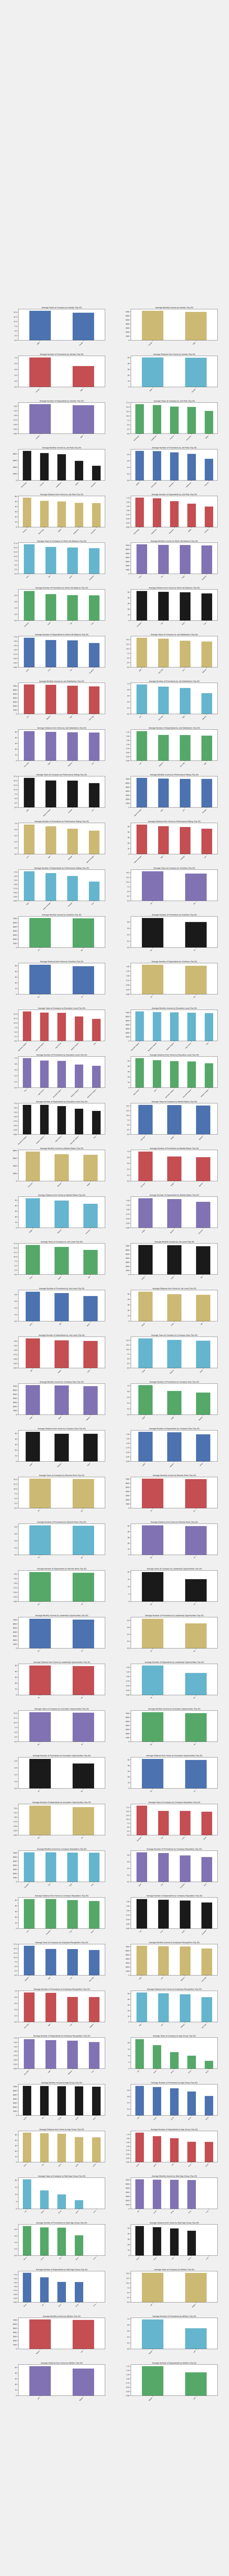

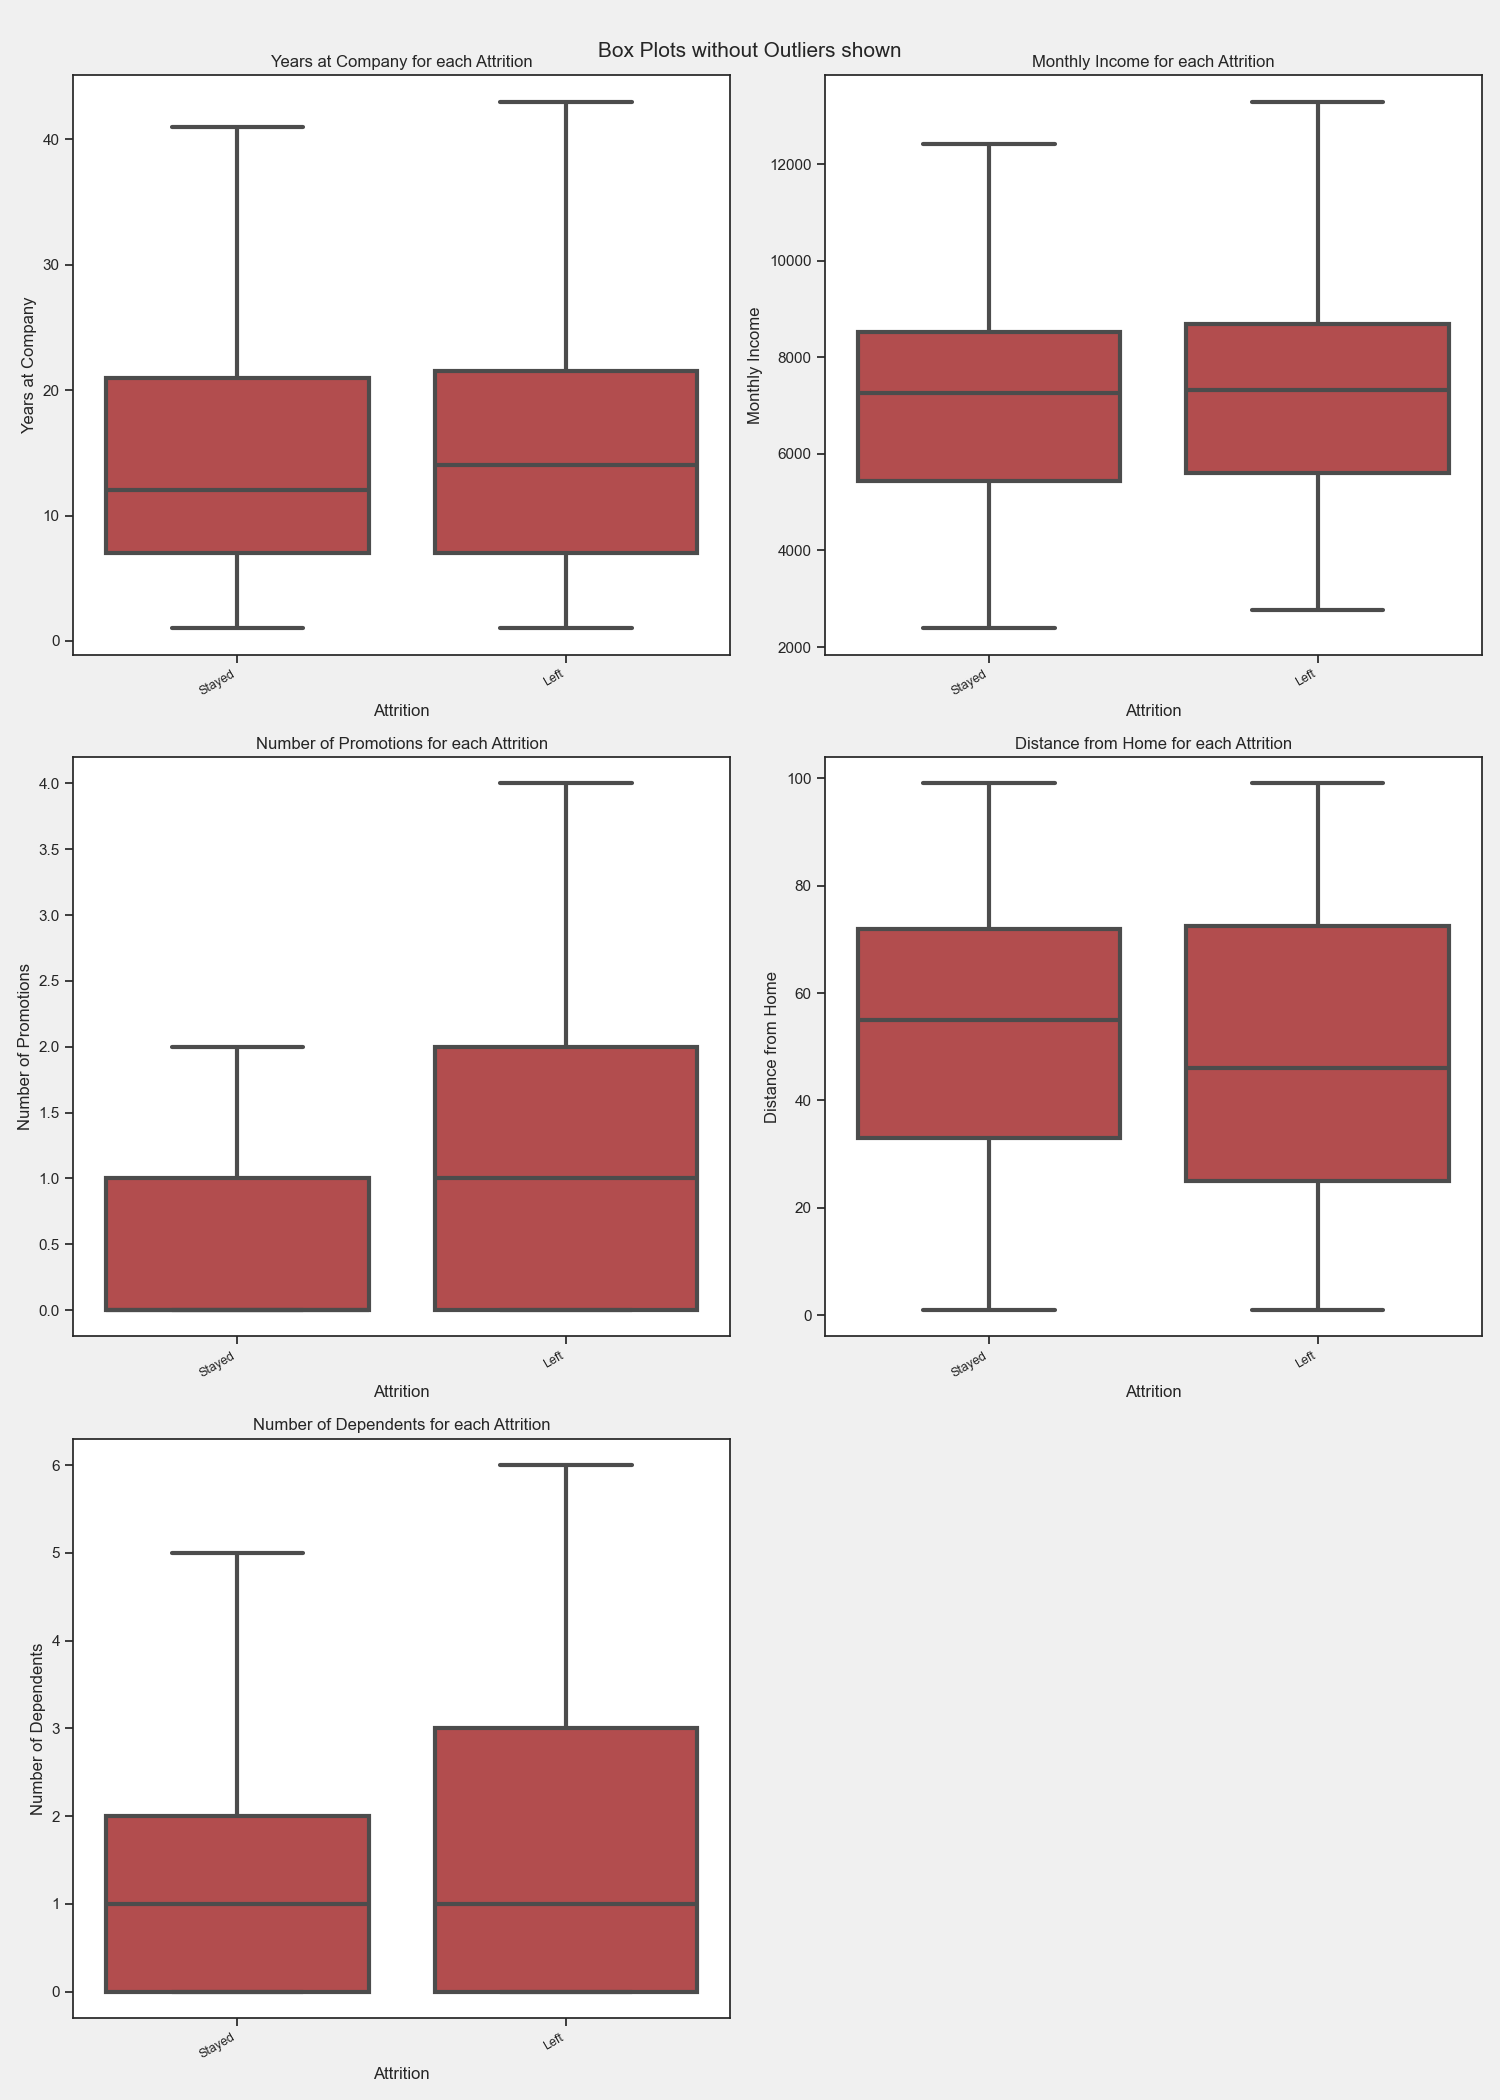

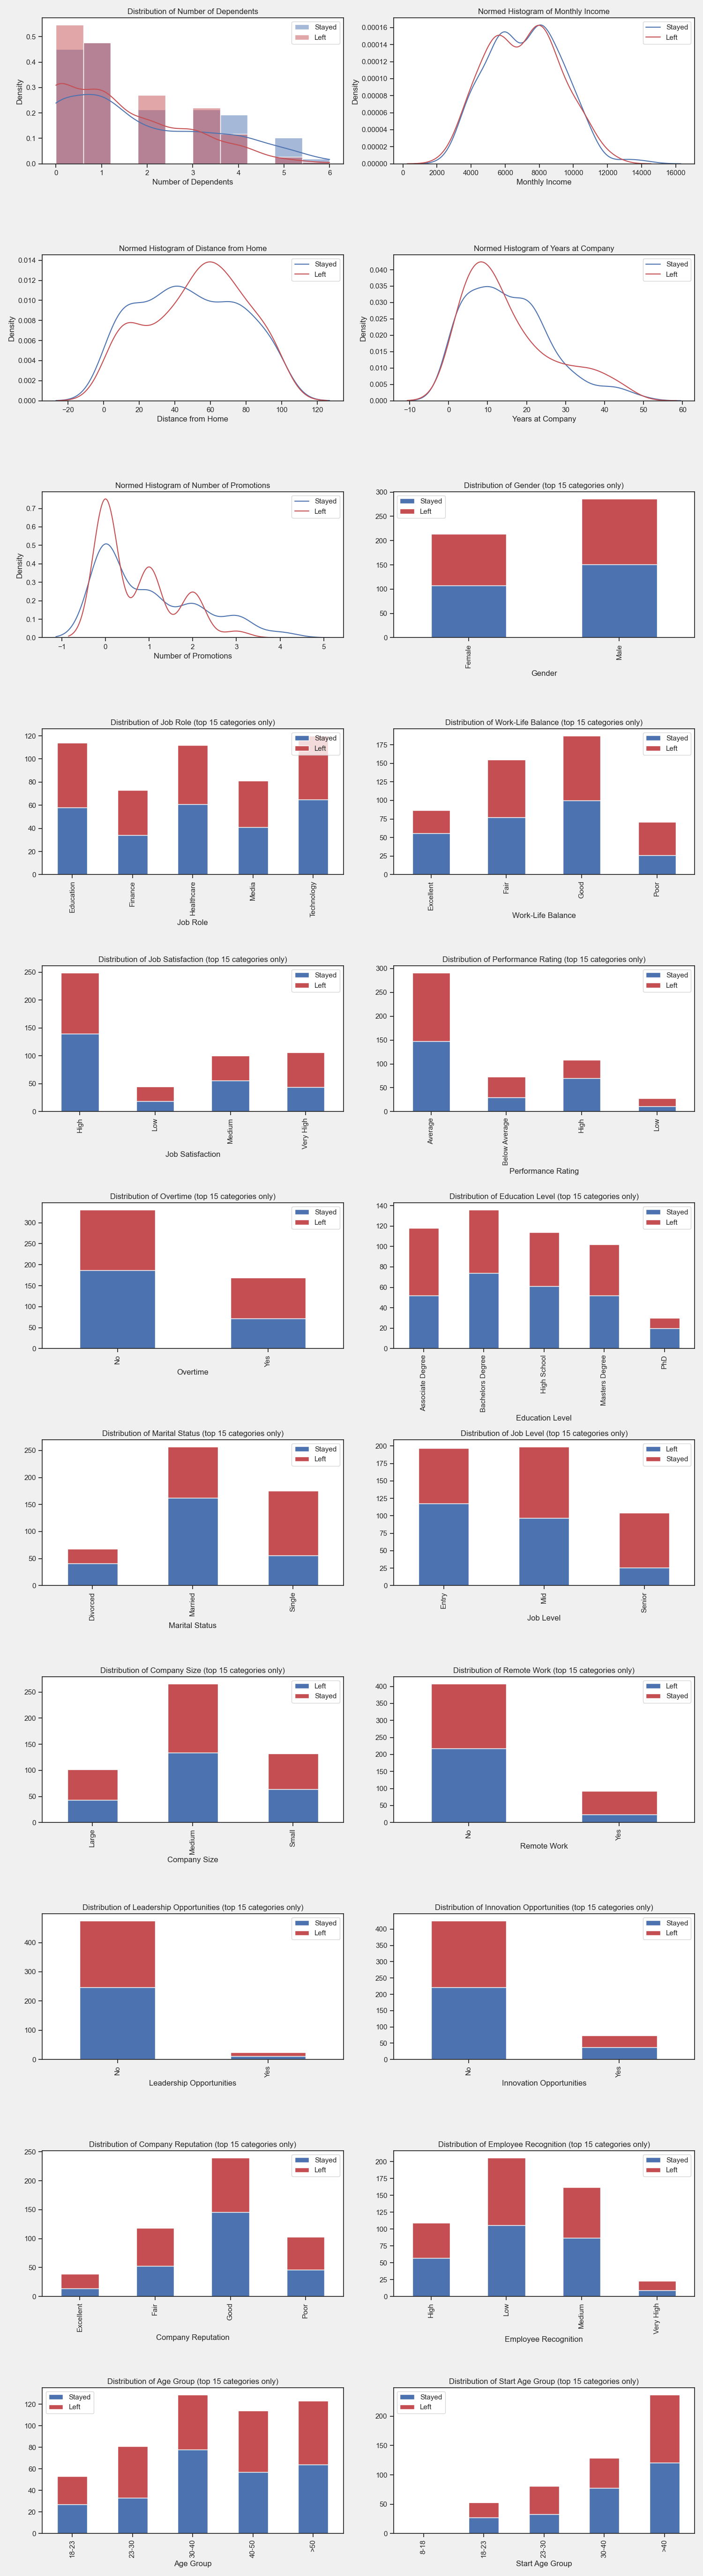

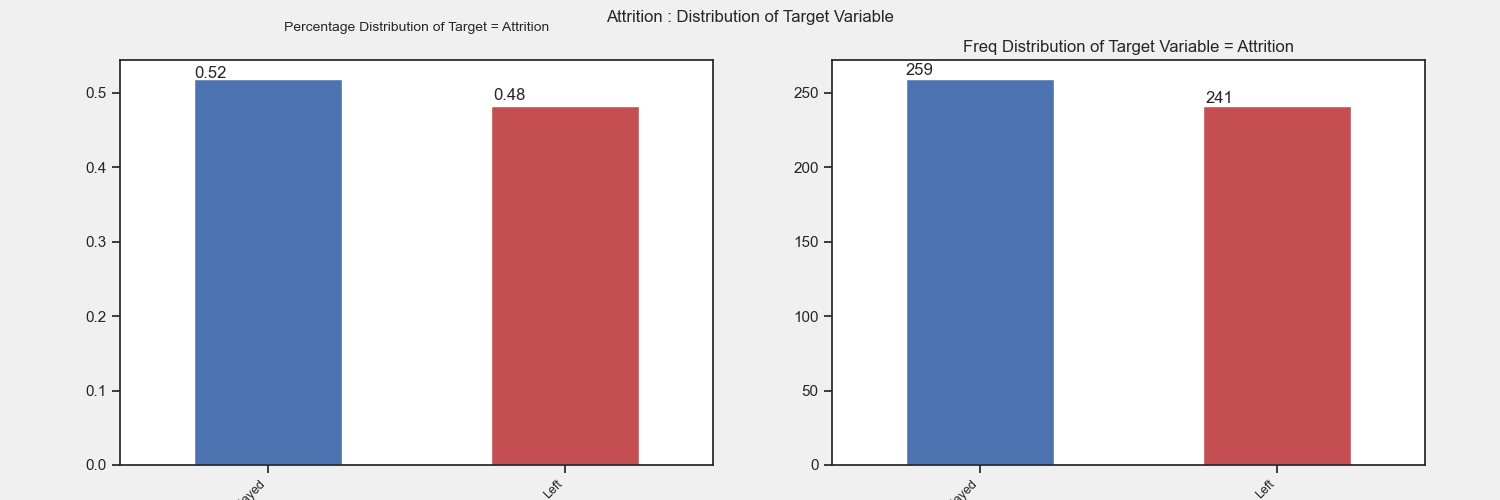

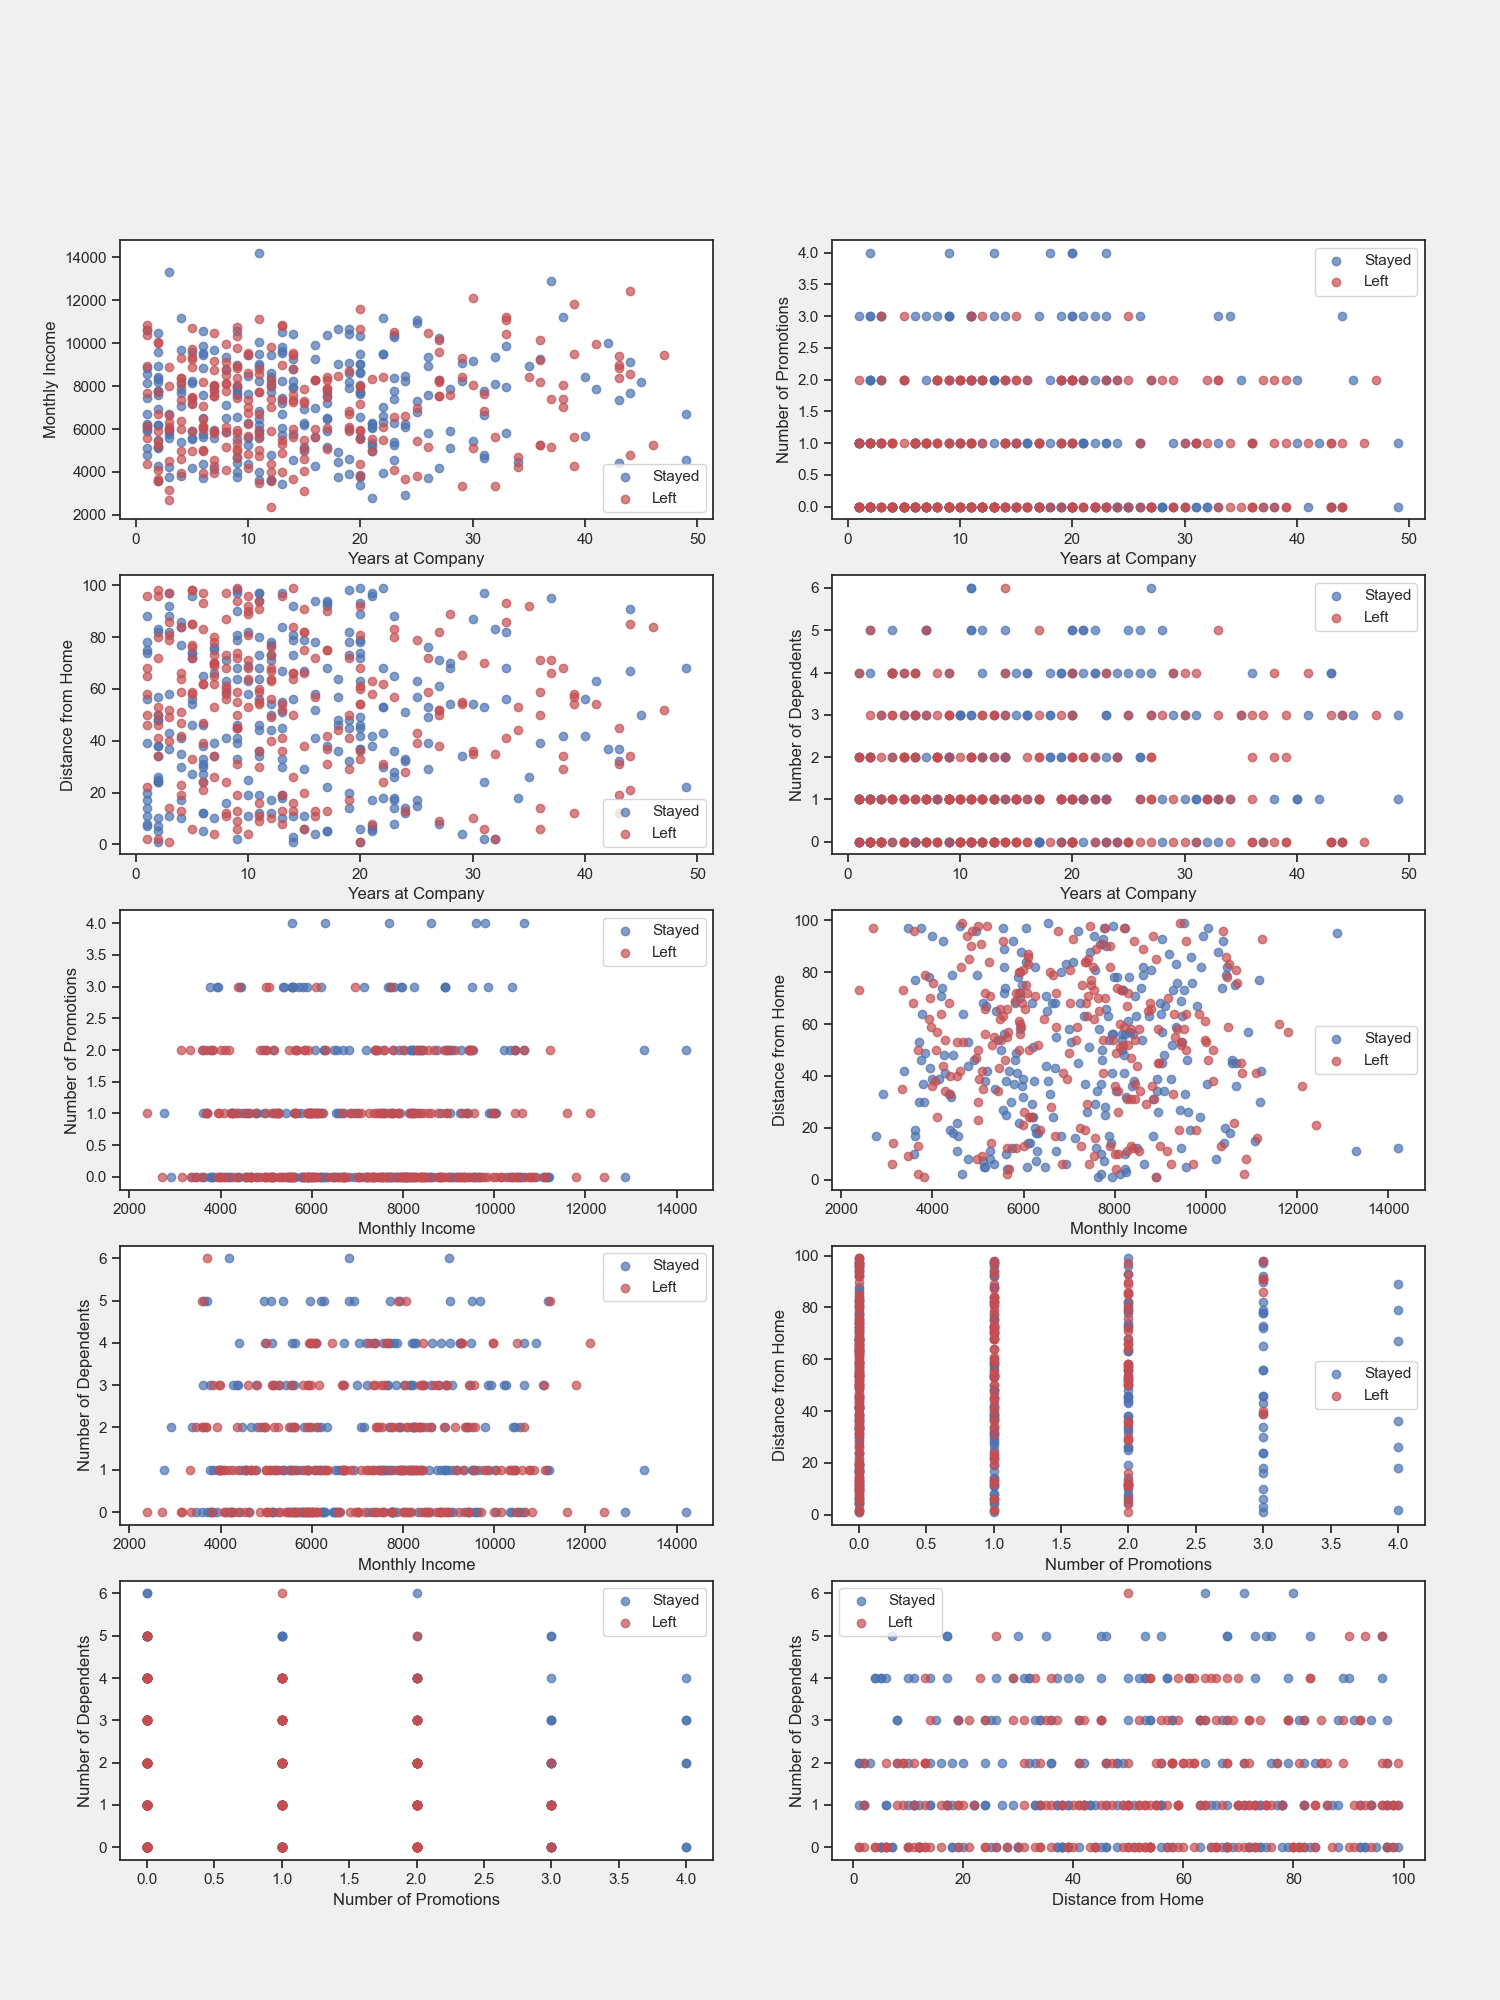

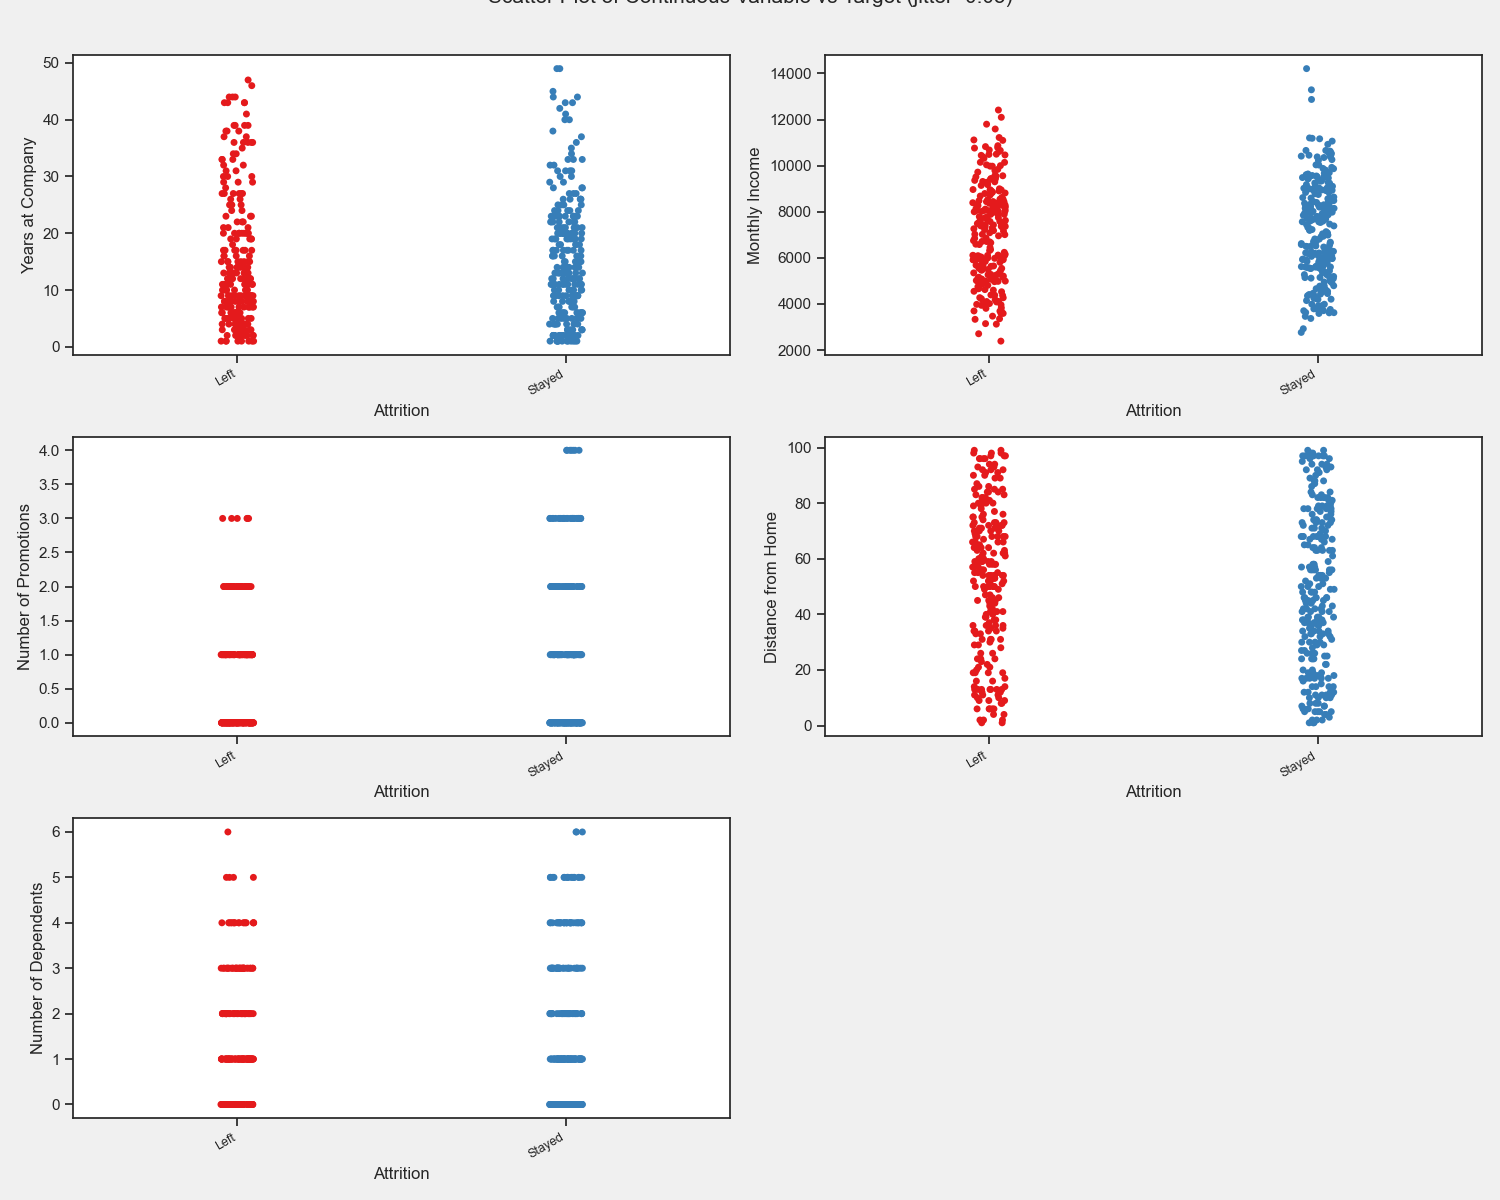

In [10]:
# Display the png images from the saved path
display_png_plots(path=saving_plots_path, target_feature="Attrition")